In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')

os.chdir('drive/My Drive/Hackathon2.0')

Mounted at /content/drive


In [3]:
import pandas as pd
import re
traint=pd.DataFrame()
testt=pd.DataFrame()
trainf=pd.DataFrame()
testf=pd.DataFrame()
for data in os.listdir():
  if re.search('time_domain',data):
    if re.search('train',data):
      traint=pd.read_csv(data)
      #traint.reset_index(inplace=True)
    elif re.search('test',data):
      testt=pd.read_csv(data)
      #testt.reset_index(inplace=True)
  elif re.search('frequency_domain',data):
    if re.search('train',data):
      trainf=pd.read_csv(data)
      #trainf.reset_index(inplace=True)
    elif re.search('test',data):
      testf=pd.read_csv(data)
      #testf.reset_index(inplace=True)
    

In [4]:
dataset=trainf.merge(traint,on='uuid')

In [5]:
dataset.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,3.692890e+05,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000
mean,2199.580170,64.289242,946.530252,34.095182,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,0.048506,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,0.523235,0.041628,-1.756587e-06,-0.000465,0.018571,0.009701,0.009701,2.006817,0.523235,0.041628
std,1815.773422,16.774844,574.171780,16.040290,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,0.049238,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,1.790348,0.699522,1.630256e-04,0.000868,0.005455,0.003897,0.003897,0.375845,1.790348,0.699522
min,159.480176,19.031219,90.048557,2.165119,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,-1.894820,-2.136278,-1.233914e-03,-0.004425,0.008987,0.003220,0.003220,1.169342,-1.894820,-2.136278
25%,1001.189280,52.909877,545.449386,22.305936,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,0.012433,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,-0.352783,-0.359291,-7.281695e-05,-0.000917,0.014261,0.006984,0.006984,1.749801,-0.352783,-0.359291
50%,1667.903111,66.350237,782.716291,32.047025,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,0.034735,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,0.040736,-0.060966,-9.330777e-07,-0.000312,0.017318,0.008691,0.008691,1.934416,0.040736,-0.060966
75%,2654.121052,76.825032,1201.432256,44.647115,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,0.067854,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,0.722833,0.282417,6.911667e-05,0.000131,0.021827,0.011460,0.011460,2.221232,0.722833,0.282417
max,12617.977191,97.738848,3291.548112,77.928847,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,0.431043,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,64.088107,6.777800,1.244098e-03,0.002095,0.036571,0.026955,0.026955,3.724134,64.088107,6.777800


In [24]:
dataset_x=dataset.drop(["HR","uuid"],axis=1)


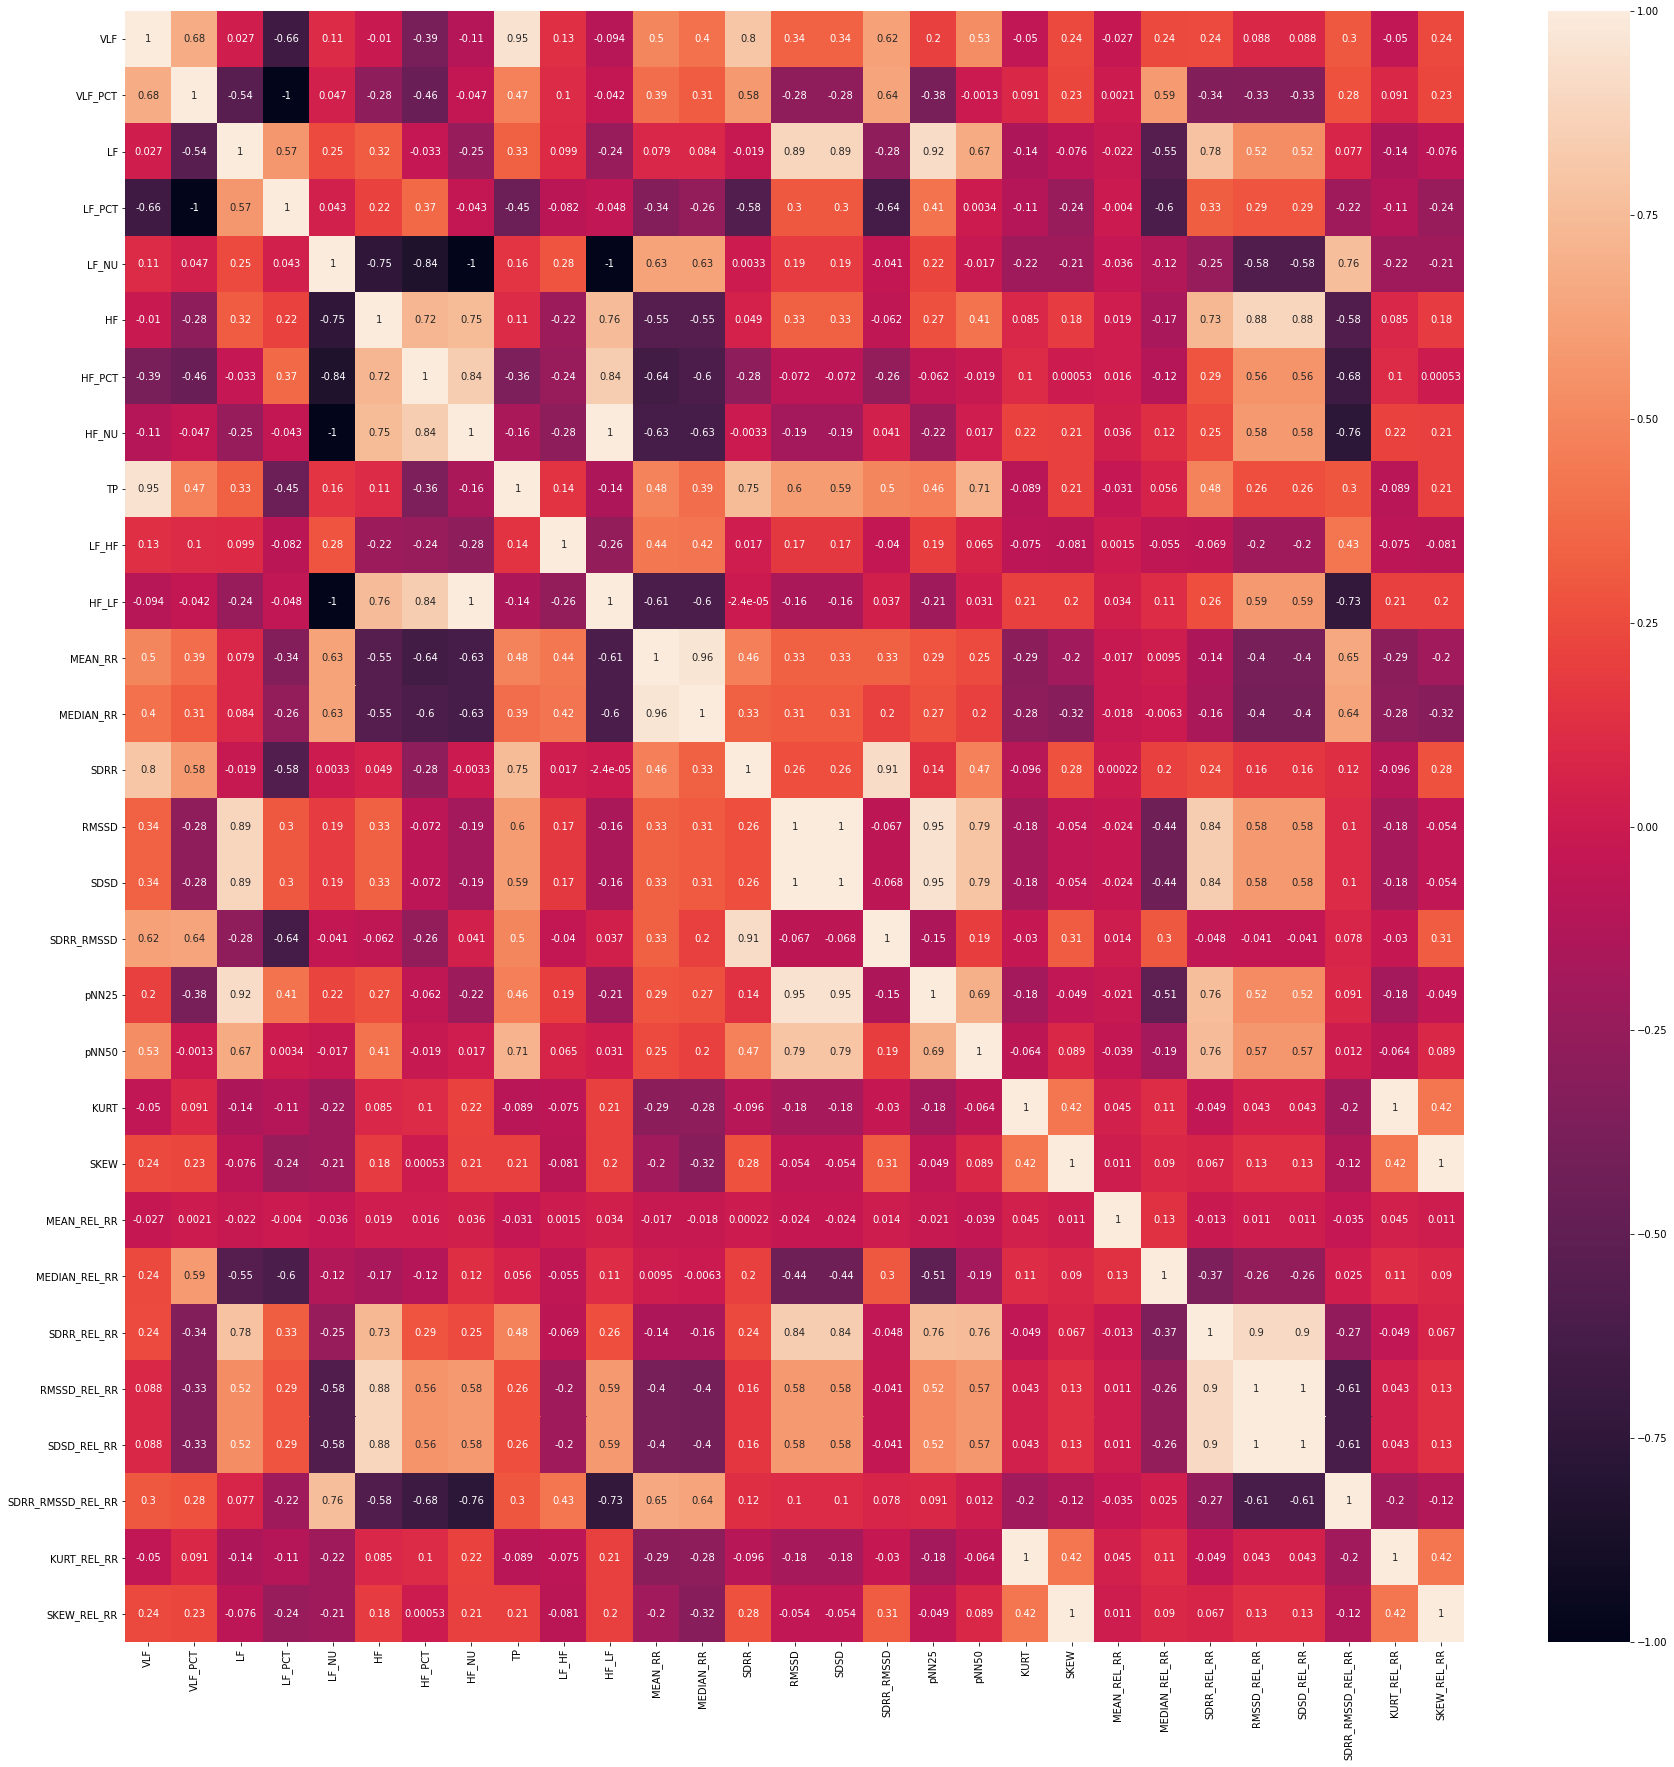

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=dataset_x.corr(method='pearson')
fig=plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)

In [88]:
idx=corr.index.values
cols=corr.columns
corr_params=[]
for c in cols:
  for i in idx:
    if abs(corr[corr.index==i][c][0])>0.5:
      if corr[corr.index==i][c][0]!=1:
        flag=0
        for val in corr_params:
          if (val[0]==c) & (val[1]==i):
            flag=1
          else:
            continue
        if flag==0:
          corr_params.append([i,c,corr[corr.index==i][c][0]])

In [89]:
for cname in corr.columns:
  count=0
  for pair in corr_params:
    if (pair[0]==cname) | (pair[1]==cname):
      count+=1
    else:
      continue

  print(cname, 'is correlated with ',count,' other parameters')

VLF is correlated with  6  other parameters
VLF_PCT is correlated with  6  other parameters
LF is correlated with  10  other parameters
LF_PCT is correlated with  6  other parameters
LF_NU is correlated with  9  other parameters
HF is correlated with  10  other parameters
HF_PCT is correlated with  9  other parameters
HF_NU is correlated with  9  other parameters
TP is correlated with  5  other parameters
LF_HF is correlated with  0  other parameters
HF_LF is correlated with  9  other parameters
MEAN_RR is correlated with  7  other parameters
MEDIAN_RR is correlated with  7  other parameters
SDRR is correlated with  5  other parameters
RMSSD is correlated with  8  other parameters
SDSD is correlated with  8  other parameters
SDRR_RMSSD is correlated with  4  other parameters
pNN25 is correlated with  8  other parameters
pNN50 is correlated with  9  other parameters
KURT is correlated with  0  other parameters
SKEW is correlated with  0  other parameters
MEAN_REL_RR is correlated with  

In [95]:
from scipy.stats import zscore
dataset_x_z=dataset_x.apply(zscore)

In [105]:
dataset_y=dataset['HR']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

VIF=[np.round(variance_inflation_factor(dataset_x_z.values,i),2) for i in range(len(dataset_x_z.columns))]

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [120]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
features=pd.DataFrame()
features['cNames']=dataset_x_z.columns.values
features['VIF']=VIF


In [121]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor=DecisionTreeRegressor()
DecisionTreeRegressor.fit(dataset_x_z,dataset_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [122]:
features['Feature Importance']=DecisionTreeRegressor.feature_importances_

In [123]:
features

,cNames,VIF,Feature Importance
0,VLF,7941661.24000,0.00022
1,VLF_PCT,659834674.65000,0.00002
2,LF,59944889821.11000,0.00001
3,LF_PCT,40232484.28000,0.00001
4,LF_NU,inf,0.00006
5,HF,51871071.78000,0.00184
6,HF_PCT,16868232.57000,0.01333
7,HF_NU,inf,0.00008
8,TP,19655764.78000,0.00032
9,LF_HF,1.55000,0.00001
